In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Collection and Inspection

In [344]:
filePath = r'C:\Users\anudi\Downloads\PersonalProjects\Data_Cleaning\messy_customer_sales_data.csv'
df = pd.read_csv(filePath)

# first 5 rows
df.head()

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52.0,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51.0 years,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62.0,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40.0,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41.0,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India


In [345]:
# last 5 rows
df.tail()

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
10195,CUST10767,Robert Lewis,female,35.0 years,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10196,NaN,Diane Evans,M,53.0,bangalore,2023-12-31,2025-05-07,11639.0,7.0,lisadennis@example.net,5200349941,IND
10197,CUST6315,Joshua Martinez,m,25.0,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55.0,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia
10199,CUST6588,David Potter,female,34.0,HYDERABAD,2020-10-12,2025-06-27,35211.0,10.0,kochjonathan@example.org,1926206725,India


In [346]:
# dataset shapes and columns
print("Shape : ", df.shape)
print("columns : ", df.columns.tolist())

Shape :  (10200, 12)
columns :  ['Customer_ID', 'Name', 'Gender', 'Age', 'City', 'Signup_Date', 'Last_Purchase_Date', 'Purchase_Amount', 'Feedback_Score', 'Email', 'Phone_Number', 'Country']


In [347]:
# data types and null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9177 non-null   object 
 1   Name                10200 non-null  object 
 2   Gender              9174 non-null   object 
 3   Age                 9249 non-null   object 
 4   City                9184 non-null   object 
 5   Signup_Date         10200 non-null  object 
 6   Last_Purchase_Date  9188 non-null   object 
 7   Purchase_Amount     9179 non-null   float64
 8   Feedback_Score      9177 non-null   float64
 9   Email               10200 non-null  object 
 10  Phone_Number        10200 non-null  int64  
 11  Country             9468 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 956.4+ KB


In [348]:
# summary statistics
df.describe().round(2)

,Purchase_Amount,Feedback_Score,Phone_Number
count,9179.00,9177.00,1.020000e+04
mean,29090.13,5.48,4.979974e+09
std,208697.09,2.87,2.902593e+09
min,-500.00,1.00,9.208990e+05
25%,12295.00,3.00,2.449157e+09
50%,24330.00,5.00,4.988639e+09
75%,37130.00,8.00,7.510448e+09
max,9999999.00,10.00,9.994402e+09


In [349]:
# Missing values summary
missing_values_count = df.isnull().sum()
missing_percentage = (missing_values_count / len(df)*100).round(2)

In [350]:
missing_summary = pd.concat([missing_values_count, missing_percentage], axis=1)
missing_summary.columns = ['missing Values count', 'missing percentage']
missing_summary.sort_values(by='missing percentage', ascending=False)

,missing Values count,missing percentage
Gender,1026,10.06
Customer_ID,1023,10.03
Feedback_Score,1023,10.03
Purchase_Amount,1021,10.01
City,1016,9.96
Last_Purchase_Date,1012,9.92
Age,951,9.32
Country,732,7.18
Name,0,0.00
Signup_Date,0,0.00


In [351]:
# if we directly do dropna all the rows will be remove
df.dropna().shape

(4528, 12)

In [352]:
# duplicate row count
print('No.of duplicate Rows : ',df.duplicated().sum())

No.of duplicate Rows :  15


In [353]:
# duplicate rows summary
df[df.duplicated()].head(15)

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
2032,CUST2755,Casey Campbell,male,NaN,Hyderabad,2023-12-01,2024-11-04,11778.0,3.0,joseph49@example.com,3844741384,India
3191,NaN,Travis Schneider,f,51.0,NaN,2025-04-20,2025-02-28,48750.0,5.0,bianca77@example.net,7623118785,India
4312,CUST8305,Stanley Cain,FEMALE,51.0,Bangalore,2023-08-14,2024-11-01,11432.0,6.0,calderonbrenda@example.org,4889366037,India
5611,CUST6288,Jonathon Kim,male,46.0,Chennai,2023-11-22,2025-03-21,3301.0,6.0,tparker@example.com,5266662560,India
5680,CUST2695,Lisa Durham,NaN,46.0,Chennai,2021-04-18,2024-10-10,6511.0,3.0,andrew34@example.com,2235480149,India
5899,CUST8841,Amanda Hill,NaN,34.0,chennai,2022-09-11,2025-03-13,42092.0,4.0,ryanriley@example.net,3466026146,India
6070,CUST10780,Emily Smith,NaN,23.0,Kolkata,2023-12-09,2024-10-28,18027.0,5.0,perezchristopher@example.com,3032282870,India
6240,CUST9745,David Morales,NaN,56.0,NaN,2023-02-18,2024-12-14,49107.0,7.0,juliaknapp@example.com,9436163110,India
6425,CUST4631,George Villa,m,26.0,Mumbai,2022-05-21,2025-06-17,NaN,8.0,davidmarquez@example.com,8869465862,India
6498,CUST1711,Stephanie Elliott,NaN,44.0,MUMBAI,2023-05-17,2025-07-12,11349.0,9.0,nfischer@example.com,3270872546,NaN


In [354]:
# category counts
df.nunique()

Customer_ID            9000
Name                   9364
Gender                    8
Age                     108
City                     18
Signup_Date            1820
Last_Purchase_Date      366
Purchase_Amount        8182
Feedback_Score           10
Email                  9797
Phone_Number          10000
Country                   4
dtype: int64

In [355]:
# category values
for col in df.columns:
    if df[col].nunique() < 20:
        print(df[col].value_counts())
        print('-'*50)

Gender
f         1184
M         1171
m         1163
F         1157
MALE      1131
female    1128
male      1121
FEMALE    1119
Name: count, dtype: int64
--------------------------------------------------
City
Kolkata       820
Mumbai        812
Chennai       784
Bangalore     773
Hyderabad     770
Delhi         763
CHENNAI       404
KOLKATA       395
MUMBAI        393
hyderabad     384
bangalore     383
DELHI         378
delhi         369
BANGALORE     363
HYDERABAD     360
mumbai        352
chennai       343
kolkata       338
Name: count, dtype: int64
--------------------------------------------------
Feedback_Score
2.0     952
4.0     947
7.0     938
6.0     927
3.0     913
8.0     912
1.0     907
9.0     903
10.0    901
5.0     877
Name: count, dtype: int64
--------------------------------------------------
Country
India    7132
IND       793
india     772
InDia     771
Name: count, dtype: int64
--------------------------------------------------


# Step 2: Handling Missing Data


In [356]:
# Make a copy to keep original data safe
df_clean = df.copy()
len(df_clean)

10200

In [357]:
# Drop rows with missing 'Customer_ID' (unique identifier)
df_clean = df_clean.dropna(subset=['Customer_ID'])
df_clean.shape

(9177, 12)

In [358]:
df_clean['Age'].unique()

array(['52.0', '51.0 years', '62.0', '40.0', '41.0', nan, '18.0',
       '43.0 years', '40.0 years', '26.0', '32.0', '22.0', '59.0', '65.0',
       '61.0', '31.0', '54.0 years', '55.0', '69.0', '61.0 years', '24.0',
       '63.0', '19.0', '50.0', '56.0', '36.0', '68.0', '43.0', '38.0',
       '27.0', '57.0 years', '23.0', '25.0', '66.0', '28.0', '30.0',
       '46.0', '48.0', '20.0', '37.0', '67.0', '51.0', '35.0', '58.0',
       '29.0', 'nan years', '39.0', '49.0', '47.0', '42.0', '44.0',
       '64.0', '53.0', '60.0', '59.0 years', '45.0', '21.0', '34.0',
       '54.0', '48.0 years', '46.0 years', '33.0', '57.0', '30.0 years',
       '58.0 years', '35.0 years', '34.0 years', '69.0 years', '250',
       '19.0 years', '27.0 years', '53.0 years', '65.0 years',
       '66.0 years', '44.0 years', '49.0 years', '25.0 years',
       '23.0 years', '62.0 years', '41.0 years', '33.0 years',
       '28.0 years', '22.0 years', '20.0 years', '42.0 years',
       '45.0 years', '3', '63.0 years', '

In [360]:
import re

def extract_age(age):
    age_num = re.findall('[0-9]+', str(age))
    if len(age_num) > 0 :
        return age_num[0]
    else:
        return age

In [361]:
df_clean['Age'] = df_clean['Age'].apply(lambda x: extract_age(x))
df_clean.head(10)

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
5,CUST1516,William Day,F,NaN,kolkata,2021-05-02,2025-06-09,27663.0,10.0,richard34@example.net,9463089646,NaN
6,CUST3651,Laura Vincent,male,18,BANGALORE,2024-06-16,2025-04-25,NaN,3.0,ymiranda@example.net,6917110630,India
7,CUST10438,Timothy Dunlap,F,43,Hyderabad,2025-03-16,2025-04-25,18355.0,9.0,christopheranderson@example.net,9981404428,india
8,CUST5189,Sabrina Miller,F,40,CHENNAI,2025-07-07,2024-10-30,NaN,10.0,shepardcolton@example.net,6233441825,India
9,CUST8237,Mr. Thomas Garcia,F,26,NaN,2025-05-24,2024-10-15,28206.0,NaN,heidimartinez@example.org,1225343854,InDia


In [362]:
df_clean['Age'].unique()

array(['52', '51', '62', '40', '41', nan, '18', '43', '26', '32', '22',
       '59', '65', '61', '31', '54', '55', '69', '24', '63', '19', '50',
       '56', '36', '68', '38', '27', '57', '23', '25', '66', '28', '30',
       '46', '48', '20', '37', '67', '35', '58', '29', 'nan years', '39',
       '49', '47', '42', '44', '64', '53', '60', '45', '21', '34', '33',
       '250', '3', '10'], dtype=object)

In [363]:
age_df = df_clean[df_clean['Age'] != 'nan years'].dropna()['Age']
age_median = int(age_df.astype('int64').median())
age_median

43

In [364]:
# replace nan with median age and extracting numbers 
df_clean['Age'].replace('nan years', age_median, inplace=True)

In [365]:
df_clean['Age'].unique()

array(['52', '51', '62', '40', '41', nan, '18', '43', '26', '32', '22',
       '59', '65', '61', '31', '54', '55', '69', '24', '63', '19', '50',
       '56', '36', '68', '38', '27', '57', '23', '25', '66', '28', '30',
       '46', '48', '20', '37', '67', '35', '58', '29', 43, '39', '49',
       '47', '42', '44', '64', '53', '60', '45', '21', '34', '33', '250',
       '3', '10'], dtype=object)

# Step 3: Filling missing data


In [366]:
# Fill numerical columns with median
df_clean['Age'].fillna(age_median, inplace=True)
df_clean['Purchase_Amount'].fillna(df_clean['Purchase_Amount'].median(), inplace=True)

# Fill categorical columns with mode
cat_col = ['Country','Gender', 'City', 'Feedback_Score']

for col in cat_col:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Forward Fill datetime column
df_clean['Last_Purchase_Date'].ffill(inplace=True)
df_clean


,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51,Kolkata,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41,CHENNAI,2024-04-05,2024-12-15,24268.0,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10194,CUST6146,Cody Thompson,f,40,Kolkata,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,female,35,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10197,CUST6315,Joshua Martinez,m,25,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55,Kolkata,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


# Step 4: Fixing Inconsistent Formatting


In [367]:
df_clean['City'] = df_clean['City'].str.strip().str.capitalize()

df_clean['Country'].replace({"IND":"India"}, inplace=True)
df_clean['Country'] = df_clean['Country'].str.strip().str.capitalize()

In [370]:
df_clean['Gender'].replace({'m':'Male', 'M':'Male', 'F':'Female', 'f':'Female'}, inplace=True) 
df_clean['Gender'] = df_clean['Gender'].str.strip().str.capitalize()

In [371]:
df_clean.head()

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,Male,52,Kolkata,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,Male,51,Kolkata,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,India
2,CUST3754,Brittney Martinez,Female,62,Hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,Female,40,Hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,India
4,CUST5683,Matthew Carroll,Female,41,Chennai,2024-04-05,2024-12-15,24268.0,8.0,denise84@example.org,2665569480,India


# Step 5: Handling Duplicates

In [372]:
df_clean.duplicated().sum()

np.int64(163)

In [373]:
df_clean = df_clean.drop_duplicates(keep='first')
df_clean.shape

(9014, 12)

In [374]:
# Check duplicates based on Customer_ID (primary key)
partial_duplicates = df_clean[df_clean.duplicated(subset=['Customer_ID'], keep=False)]
print(f"Partial Duplicates (Customer ID): {partial_duplicates.shape[0]}")
partial_duplicates.sort_values(by='Customer_ID').head()


Partial Duplicates (Customer ID): 28


,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
8155,CUST1002,Angie Henderson,Female,46,Delhi,2022-09-28,2025-08-25,35963.0,2.0,houstonalexis@example.org,5052686676,India
2430,CUST1002,Angie Henderson,Female,46,Delhi,2022-09-28,2025-08-09,35963.0,2.0,houstonalexis@example.org,5052686676,India
9656,CUST10236,Brittney Boyd,Male,19,Kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,India
6615,CUST10236,Brittney Boyd,Male,250,Kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,India
1914,CUST2510,Henry Taylor,Female,29,Bangalore,2021-06-09,2025-06-14,24268.0,2.0,woodwilliam@example.com,6090100995,India


In [375]:
df_clean = df_clean.drop_duplicates(subset=['Customer_ID'], keep='first')
df_clean.shape

(9000, 12)

# Step 5: Correcting Data Types

In [376]:
df_clean.dtypes

Customer_ID            object
Name                   object
Gender                 object
Age                    object
City                   object
Signup_Date            object
Last_Purchase_Date     object
Purchase_Amount       float64
Feedback_Score        float64
Email                  object
Phone_Number            int64
Country                object
dtype: object

In [377]:
df_clean['Signup_Date'] = pd.to_datetime(df_clean['Signup_Date'])
df_clean['Last_Purchase_Date'] = pd.to_datetime(df_clean['Last_Purchase_Date'])
df_clean['Age'] = df_clean['Age'].astype('int64')
df_clean.dtypes

Customer_ID                   object
Name                          object
Gender                        object
Age                            int64
City                          object
Signup_Date           datetime64[ns]
Last_Purchase_Date    datetime64[ns]
Purchase_Amount              float64
Feedback_Score               float64
Email                         object
Phone_Number                   int64
Country                       object
dtype: object

# Step 6: Handling Outliers

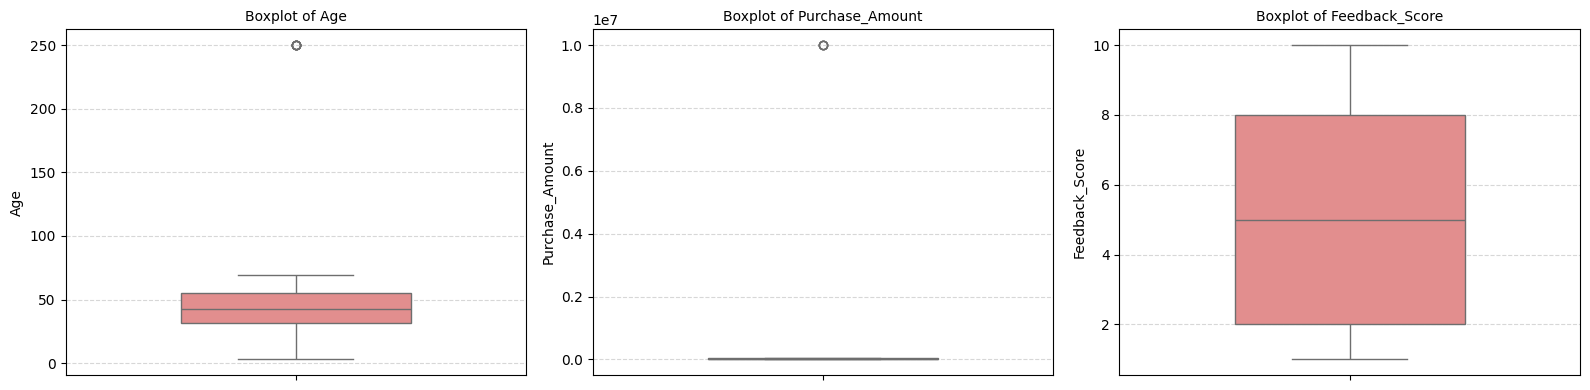

In [378]:
cols = ['Age', 'Purchase_Amount', 'Feedback_Score']

plt.figure(figsize=(16,4))
for i, col in enumerate(cols, 1):
    plt.subplot(1,3,i)
    sns.boxplot(y=df_clean[col], color='lightcoral', width=0.5)
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [379]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_clean[['Age', 'Purchase_Amount', 'Feedback_Score']]))

# Identify outliers (any row with z > 3)
outlier_mask = (z_scores > 3).any(axis=1)
print(f"\n Number of outliers detected (Z-score method): {outlier_mask.sum()}")

# Display sample outliers
df_clean[outlier_mask]


 Number of outliers detected (Z-score method): 11


,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
470,CUST6977,Tyler Stout,Female,250,Chennai,2022-05-21,2025-05-31,3554.0,2.0,hudsonsandra@example.net,5752427586,India
932,CUST1207,Cathy Robinson,Female,250,Delhi,2024-10-24,2025-10-01,23012.0,6.0,jefftaylor@example.org,1244788430,India
2383,CUST3987,Erica Johnson,Male,47,Kolkata,2020-11-03,2025-08-10,9999999.0,5.0,bflowers@example.com,747807729,India
3368,CUST7314,Gavin Yates,Male,50,Bangalore,2022-06-30,2025-03-22,9999999.0,10.0,millermichael@example.com,1481715956,India
4674,CUST8481,Denise Combs,Female,62,Mumbai,2024-10-06,2025-07-08,9999999.0,3.0,cmorales@example.net,2931912910,India
4692,CUST10561,Richard Brown,Female,58,Mumbai,2024-04-13,2025-09-08,9999999.0,2.0,kevintaylor@example.net,7047881855,India
5279,CUST4536,Alexandra Ramos,Male,250,Chennai,2021-09-30,2025-03-03,3296.0,10.0,drakemichelle@example.org,5651607326,India
5949,CUST7041,Joseph Young,Male,250,Delhi,2022-01-20,2024-11-26,1131.0,8.0,pmckenzie@example.org,9456700786,India
6085,CUST8110,Betty Cole,Female,250,Bangalore,2024-01-07,2025-04-12,25974.0,1.0,dmitchell@example.net,366613689,India
6615,CUST10236,Brittney Boyd,Male,250,Kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,India


In [380]:
df_clean = df_clean[~outlier_mask]

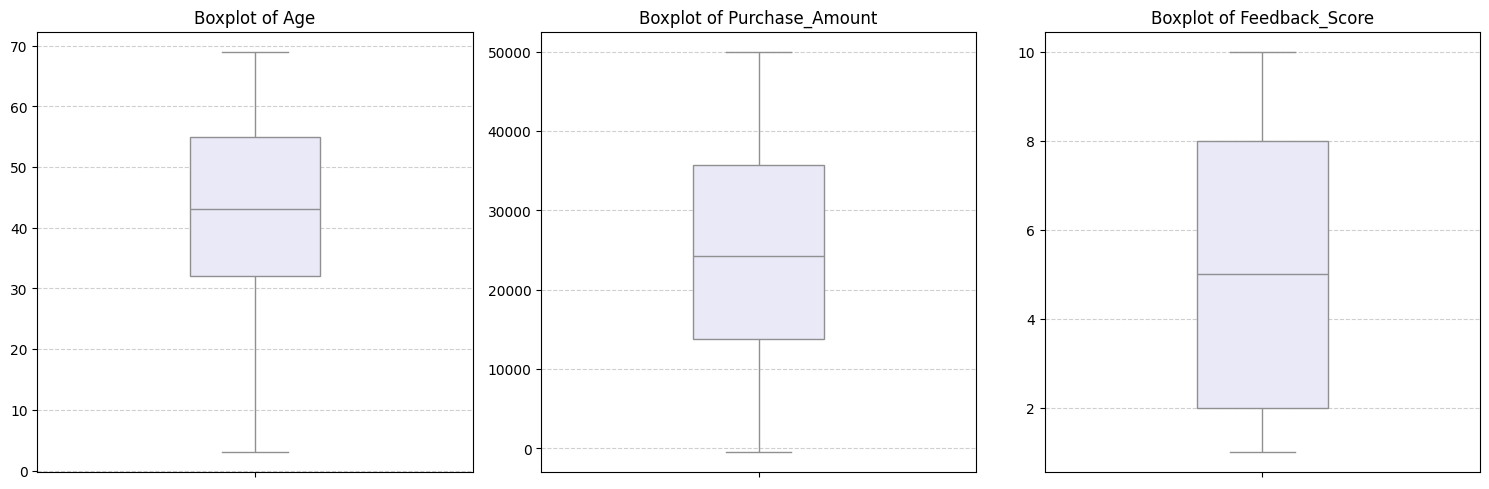

In [381]:
cols = ['Age', 'Purchase_Amount', 'Feedback_Score']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_clean[col], color='lavender', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

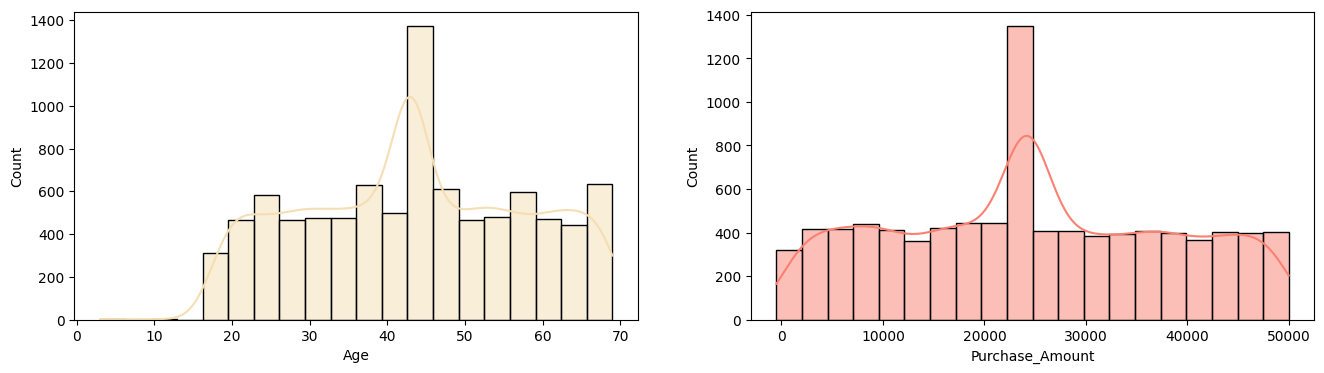

In [382]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.histplot(df_clean["Age"], bins=20, color='wheat', kde=True)

plt.subplot(1,2,2)
sns.histplot(df_clean['Purchase_Amount'], bins=20, color='salmon', kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

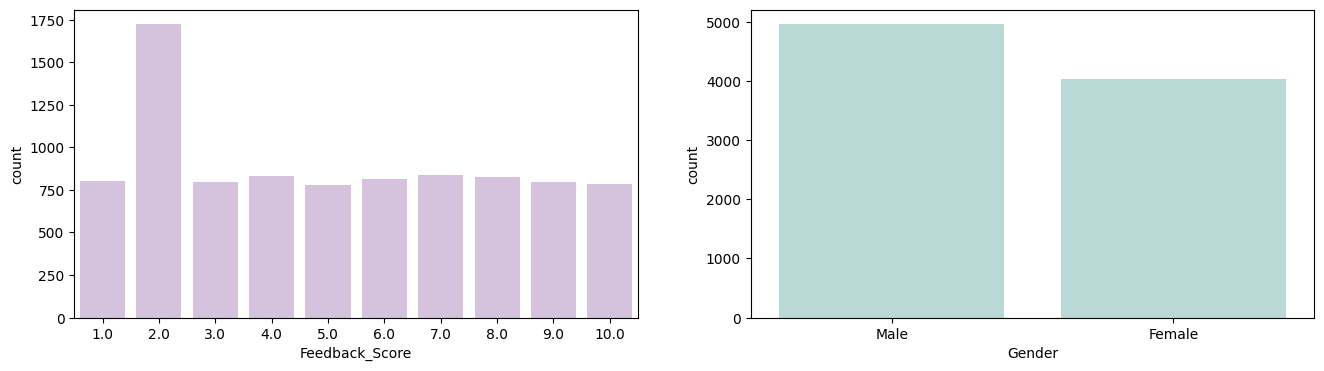

In [383]:
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
sns.countplot(x='Feedback_Score', data=df_clean, color='#D7BDE2')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df_clean, color='#B2DFDB')

<Axes: xlabel='City', ylabel='count'>

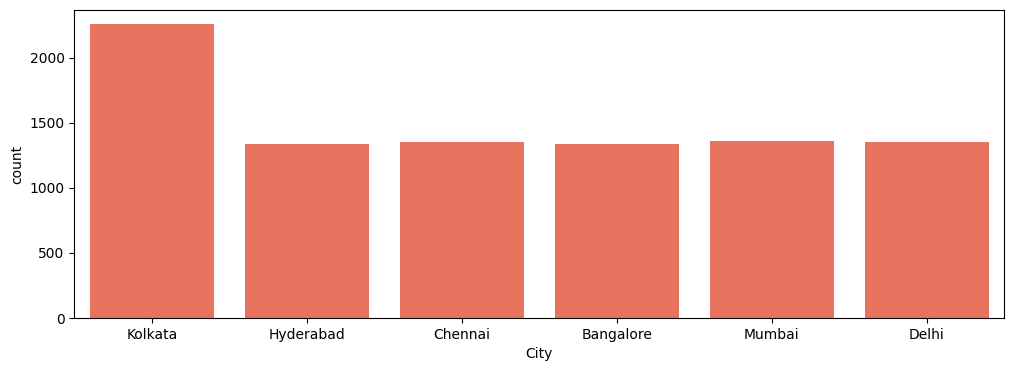

In [384]:
plt.figure(figsize=(12,4))
sns.countplot(x='City', data=df_clean, color='tomato')


<Axes: xlabel='Age', ylabel='Purchase_Amount'>

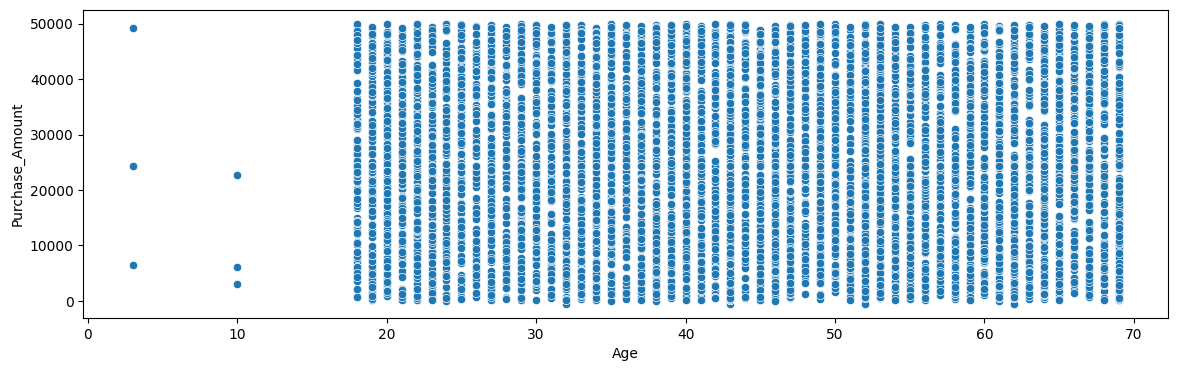

In [385]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='Age', y='Purchase_Amount', data=df_clean, )

<Axes: xlabel='City', ylabel='Feedback_Score'>

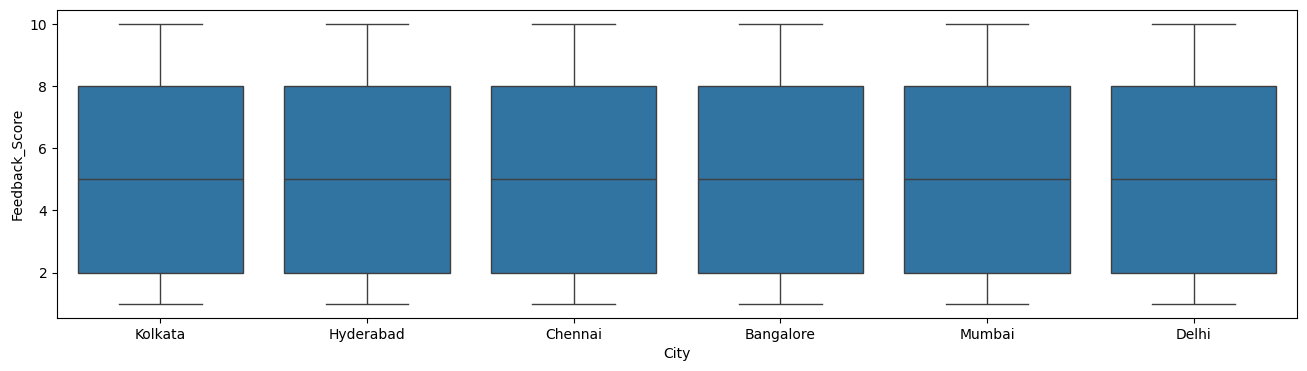

In [386]:
plt.figure(figsize=(16,4))
sns.boxplot(x='City', y='Feedback_Score', data=df_clean)

<Axes: xlabel='Last_Purchase_Date'>

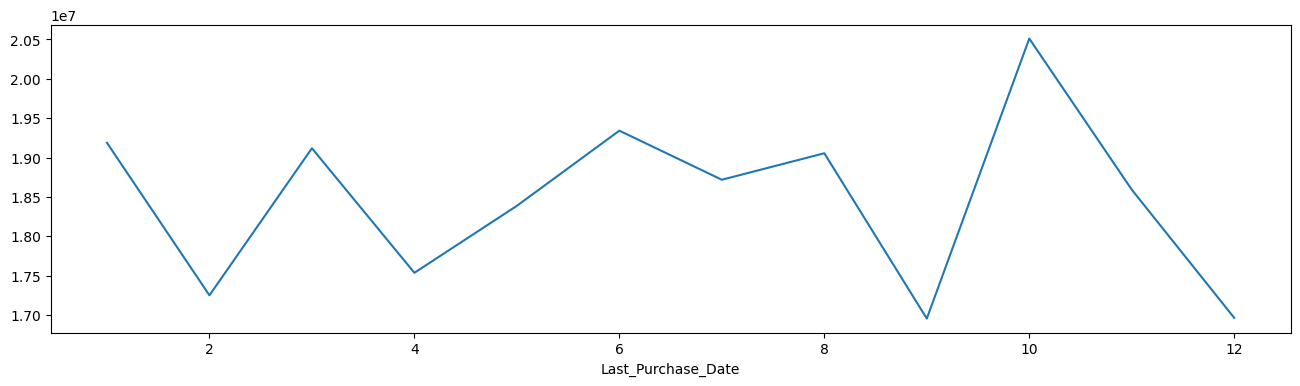

In [387]:
plt.figure(figsize=(16,4))
# df_clean['Last_Purchase_Date'] = pd.to_datetime(df_clean['Last_Purchase_Date'])
df_clean.loc[:, 'Last_Purchase_Date'] = pd.to_datetime(df_clean['Last_Purchase_Date'])
df_clean.groupby(df_clean['Last_Purchase_Date'].dt.month)['Purchase_Amount'].sum().plot()


<Axes: xlabel='City', ylabel='Purchase_Amount'>

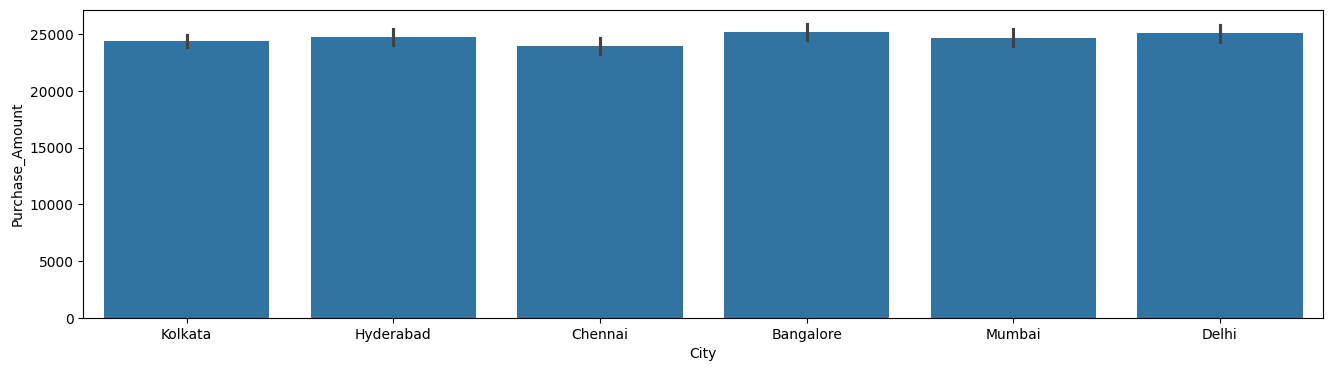

In [388]:
plt.figure(figsize=(16,4))
sns.barplot(x='City', y='Purchase_Amount', data=df_clean, estimator='mean')


<Axes: xlabel='Gender', ylabel='Feedback_Score'>

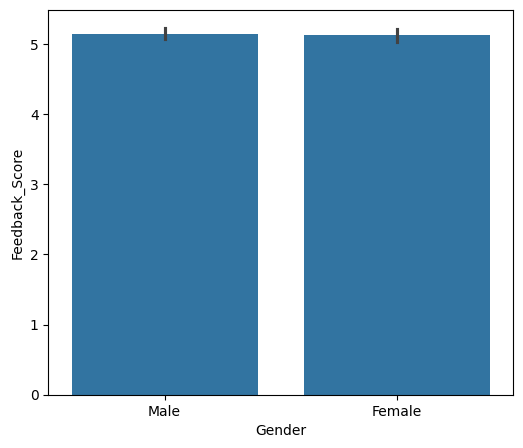

In [389]:
plt.figure(figsize=(6,5))
sns.barplot(x='Gender', y='Feedback_Score', data=df_clean)

<Axes: >

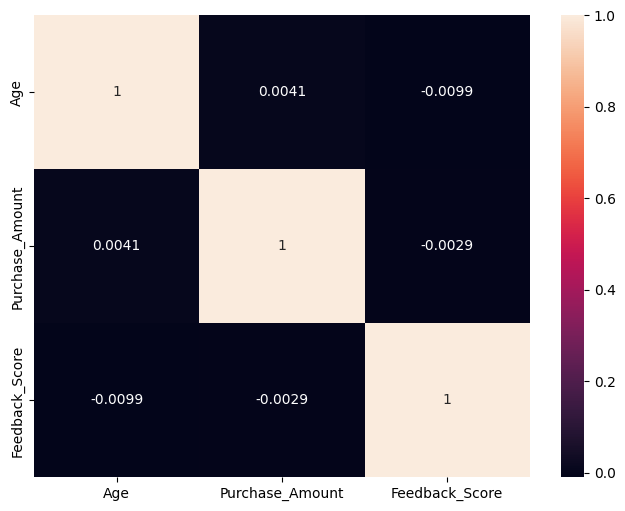

In [390]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['Age','Purchase_Amount','Feedback_Score']].corr(), annot=True)


<Axes: xlabel='Gender', ylabel='Purchase_Amount'>

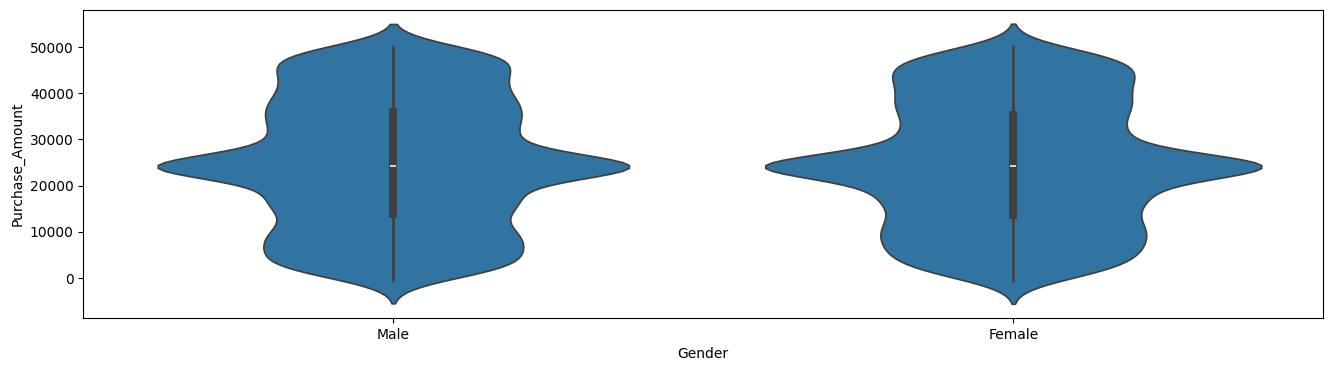

In [391]:
plt.figure(figsize=(16,4))
sns.violinplot(x='Gender', y='Purchase_Amount', data=df_clean)